## Correlation between lowercase_200000 model input and output length

In [2]:
import seaborn as sns
import pandas as pd

In [4]:
with open('../output/small_lowercase-model_epoch1_21.47.t7.pred') as f:
    output = [x.strip() for x in f.readlines()]

In [7]:
with open('../data/test/src-test.txt') as f:
    src = [x.strip() for x in f.readlines()]

In [8]:
input_len = [len(x) for x in src]
output_len = [len(y) for y in output]

data = pd.DataFrame({'input_len': input_len, 'output_len': output_len})

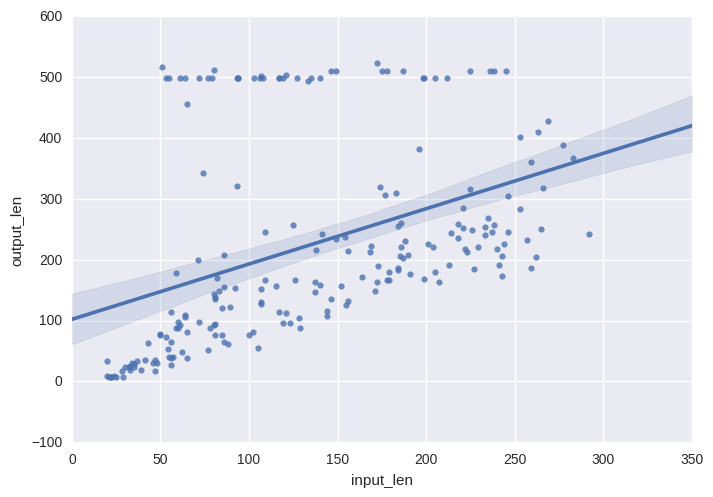

In [9]:
sns.regplot(x="input_len", y="output_len", data=data)
sns.plt.show()

The correlation is present, although very weak. Also, there seems to be a class of outliers that behave the same.

### What are these outliers on top?

In [10]:
outliers = [i for i,l in enumerate(output_len) if l > 450]

In [11]:
outliers

[0,
 9,
 13,
 18,
 25,
 29,
 32,
 34,
 55,
 67,
 72,
 80,
 81,
 83,
 85,
 88,
 89,
 93,
 96,
 108,
 112,
 114,
 117,
 122,
 127,
 131,
 137,
 142,
 144,
 157,
 158,
 159,
 160,
 170,
 175,
 179,
 182,
 187,
 193]

In [12]:
for i in outliers:
    print(output[i])

[ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [
] [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [


It seems that the output phase can get stuck in a place where it just generates opening brackets. Since opening brackets often occur together, one can imagine that if the RNN behaves as in a Markov model, not looking too far behind, this could happen.

#### Is there anything in the source string that could cause that?

In [14]:
for i in outliers:
    print(src[i], end='\n\n')

I'm|L|_ at|P|_ Mr.|^|_ Mikes|^|_ .|,|_ http://4sq.com/aJMfc8|U|_

@Iambunnylavish|@|_ Yeah|!|_ Im|L|_ goodie|A|_ just|R|_ in|P|_ the|D|_ lab|N|_ working|V|_ ...|,|_ Wow|!|_ !|,|_ I|O|_ need|V|_ to|P|_ be|V|_ where|R|_ you|O|_ at|P|_ !|,|_ lol|!|_ let|V|_ me|O|_ visit|V|_

@THEREALDOCG|@|_ give|V|_ him|O|_ my|D|_ love|N|_ !|,|_

@Nvied|@|_ has|V|_ no|D|_ sense|N|_ !!!|,|_ LOL|!|_

Umm|!|_ @Twitter|@|_ took|V|_ away|R|_ my|D|_ favorites|N|CONJ and|&|_ my|D|_ Dm's|N|CONJ from|P|_ Aaron|^|_ !|,|_ Lol|!|_ Naw|!|_ this|O|_ is|V|_ serious|A|CONJ !|,|_ and|&|_ slackness|N|CONJ .|,|_

THE|D|_ HEAT|^|_ WON'T|V|CONJ BE|V|_ READY|A|_ ITIL|P|_ JANUARY|^|_ BUT|&|_ WE|O|_ WILL|V|CONJ

@Orange__Crush|@|_ lol|!|_ you're|L|_ lame|A|_ ;)|E|_

RT|~|_ @AntWILD|@|_ :|~|_ @blasian_BW|@|_ @deenoGreen|@|_ @weareMajor|@|_ @xannsx|@|_ Chck|V|_ out|T|MWE I|O|_ CAN|V|_ RAP|V|_ !|,|_ http://youtu.be/mMbNW2mtYw4|U|_ &|&|_ the|D|_ TAKEOVER|N|_ !|,|_ http://youtu.be|U|_ ...|~|_

RT|~|_ @Victorian4ED|@|_ :|~|_ #Quote|N

Nothing obvious to me...

### Let's look at the correlation without these outliers.

In [16]:
outliers = set(outliers)
no_outlier_output_len = [x for i, x in enumerate(output_len) if i not in outliers]
no_outlier_input_len = [x for i, x in enumerate(input_len) if i not in outliers]
no_outlier_data = pd.DataFrame({'input_len': no_outlier_input_len, 'output_len': no_outlier_output_len})

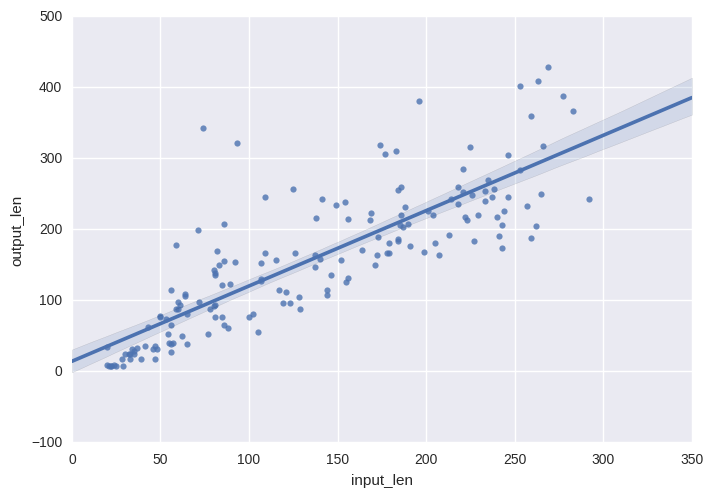

In [17]:
sns.regplot(x="input_len", y="output_len", data=no_outlier_data)
sns.plt.show()

The correlation is much stronger now.